### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#1. Análise do faturamento


In [2]:
# Colocando os dataframes das lojas em uma lista
todas_as_lojas = [loja, loja2, loja3, loja4]

# Criando uma lista vazia para guardar o faturamento
faturamento_lojas = []

# Percorrendo cada loja na lista e somando o faturamento
for df_loja in todas_as_lojas:
    faturamento_lojas.append(df_loja["Preço"].sum())

In [3]:
# Analisando faturamento
vendas_por_loja = pd.DataFrame({
    'Lojas': ['Loja 1','Loja 2','Loja 3','Loja 4'],
    'Vendas': [
        loja["Preço"].sum(),
        loja2["Preço"].sum(),
        loja3["Preço"].sum(),
        loja4["Preço"].sum()
    ]})


vendas_por_loja['Vendas'] = vendas_por_loja['Vendas'].map(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

# Exibindo o resultado final
print(vendas_por_loja)

# Adicionando um identificador de loja a cada DataFrame
loja['ID Loja'] = 1
loja2['ID Loja'] = 2
loja3['ID Loja'] = 3
loja4['ID Loja'] = 4

# Unificando todos os DataFrames em um só
df_lojas_unificadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

    Lojas           Vendas
0  Loja 1  R$ 1.534.509,12
1  Loja 2  R$ 1.488.459,06
2  Loja 3  R$ 1.464.025,03
3  Loja 4  R$ 1.384.497,58


# 2. Vendas por Categoria


In [4]:
# Contando as vendas de cada categoria por loja com base no preço
vendas_por_categoria_e_loja = df_lojas_unificadas.groupby(
    ['Categoria do Produto', 'ID Loja']
)['Preço'].sum().unstack(fill_value=0)

# Criando a coluna de 'Total' e ordenando a tabela
vendas_por_categoria_e_loja = vendas_por_categoria_e_loja.assign(
    Total = vendas_por_categoria_e_loja.sum(axis=1)
).sort_values(by='Total', ascending=False)

# Função para formatar os valores para o padrão brasileiro
def formatar_br(valor):
    return f"{valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")


vendas_por_categoria_e_loja = vendas_por_categoria_e_loja.apply(lambda x: x.map(formatar_br))

# Imprimindo a tabela
print("Faturamento por Categoria e por Loja (ordenado por total):")
print(vendas_por_categoria_e_loja)

Faturamento por Categoria e por Loja (ordenado por total):
ID Loja                         1           2           3           4  \
Categoria do Produto                                                    
eletronicos            572.659,23  547.773,71  547.699,92  545.966,86   
eletrodomesticos       484.913,36  464.758,13  438.984,89  377.680,65   
moveis                 250.178,11  235.234,68  268.095,56  256.705,65   
instrumentos musicais  121.731,69  139.987,03  103.174,45  100.136,50   
esporte e lazer         52.387,55   46.326,09   47.456,10   44.465,65   
brinquedos              23.993,78   21.262,21   25.869,20   27.015,67   
utilidades domesticas   16.931,48   19.662,86   20.080,21   20.098,83   
livros                  11.713,92   13.454,35   12.664,70   12.427,77   

ID Loja                       Total  
Categoria do Produto                 
eletronicos            2.214.099,72  
eletrodomesticos       1.766.337,03  
moveis                 1.010.214,00  
instrumentos musicai

# 3. Média de Avaliação das Lojas

In [5]:

# Calculando a média de avaliação de cada loja
media_por_loja = df_lojas_unificadas.groupby('ID Loja')['Avaliação da compra'].mean().reset_index()

# Renomeando a coluna para facilitar a leitura
media_por_loja.columns = ['Loja', 'Média de Avaliação']

# Ordenando o DataFrame em ordem crescente de avaliação
media_por_loja = media_por_loja.sort_values(by='Média de Avaliação', ascending=False)

# Imprimindo o DataFrame
print("Média de Avaliação das Lojas (em ordem derescente):")
print(media_por_loja)

Média de Avaliação das Lojas (em ordem derescente):
   Loja  Média de Avaliação
2     3            4.048326
1     2            4.037304
3     4            3.995759
0     1            3.976685


# 4. Produtos Mais e Menos Vendidos

In [6]:
# Lista de DataFrames para cada loja
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Lista para armazenar os DataFrames de cada loja
resultados_por_loja = []

# Loop para processar cada loja individualmente
for i, loja_df in enumerate(lojas):
    # Calcula os 5 mais vendidos para a loja atual
    produtos = loja_df['Produto'].value_counts().head(5).reset_index()
    produtos.columns = ['Produto', 'Qtd']

    # Adiciona a coluna com o nome da loja para o MultiIndex
    produtos.columns = pd.MultiIndex.from_product([[nomes_lojas[i]], produtos.columns])

    # Adiciona o DataFrame à lista de resultados
    resultados_por_loja.append(produtos)

# Concatena todos os resultados lado a lado
top5_por_loja = pd.concat(resultados_por_loja, axis=1)

# Imprime o resultado final
print("Top 5 Produtos Mais Vendidos por Loja:")
print(top5_por_loja)

Top 5 Produtos Mais Vendidos por Loja:
               Loja 1                        Loja 2               Loja 3      \
              Produto Qtd                   Produto Qtd          Produto Qtd   
0         Micro-ondas  60  Iniciando em programação  65    Kit banquetas  57   
1       TV Led UHD 4K  60               Micro-ondas  62   Mesa de jantar  56   
2       Guarda roupas  60                   Bateria  61        Cama king  56   
3  Secadora de roupas  58                    Violão  58  Jogo de panelas  55   
4              Cômoda  56                  Pandeiro  58           Cômoda  55   

                     Loja 4      
                    Produto Qtd  
0                  Cama box  62  
1                  Faqueiro  59  
2   Dashboards com Power BI  56  
3                 Cama king  56  
4  Carrinho controle remoto  55  


In [7]:
# Lista de DataFrames para cada loja
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Lista para armazenar os DataFrames de cada loja
resultados_por_loja = []

# Loop para processar cada loja individualmente
for i, loja_df in enumerate(lojas):
    # Calcula os 5 MENOS vendidos para a loja atual

    produtos = loja_df['Produto'].value_counts().tail(5).reset_index()
    produtos.columns = ['Produto', 'Qtd']

    # Adiciona a coluna com o nome da loja para o MultiIndex
    produtos.columns = pd.MultiIndex.from_product([[nomes_lojas[i]], produtos.columns])

    # Adiciona o DataFrame à lista de resultados
    resultados_por_loja.append(produtos)

# Concatena todos os resultados lado a lado
top5_por_loja = pd.concat(resultados_por_loja, axis=1)

# Imprime o resultado final
print("Top 5 Produtos Menos Vendidos por Loja:")
print(top5_por_loja)

Top 5 Produtos Menos Vendidos por Loja:
                        Loja 1                 Loja 2                Loja 3  \
                       Produto Qtd            Produto Qtd           Produto   
0  Ciência de dados com python  39     Fone de ouvido  37          Guitarra   
1                     Pandeiro  36           Poltrona  35     Jogo de copos   
2            Panela de pressão  35     Mesa de jantar  34           Mochila   
3                      Headset  33         Impressora  34       Micro-ondas   
4                 Celular ABXY  33  Jogo de tabuleiro  32  Blocos de montar   

                            Loja 4      
  Qtd                      Produto Qtd  
0  38                    Geladeira  38  
1  36  Ciência de dados com python  38  
2  36                       Violão  37  
3  36                Guarda roupas  34  
4  35                     Guitarra  33  


# 5. Frete Médio por Loja


In [8]:
# Agrupando por 'ID Loja' e calculando o custo médio do frete
frete_medio_por_loja = df_lojas_unificadas.groupby('ID Loja')['Frete'].mean().reset_index()

# Renomeando as colunas para facilitar a leitura
frete_medio_por_loja.columns = ['Loja', 'Frete Médio']

# Formatando a coluna 'Frete Médio' com 3 casas decimais e adicionando 'R$'
frete_medio_por_loja['Frete Médio'] = frete_medio_por_loja['Frete Médio'].apply(
    lambda x: f"R$ {x:.3f}"
)

# Imprimindo o resultado
print("\nO custo médio do frete por loja é:")
print(frete_medio_por_loja)


O custo médio do frete por loja é:
   Loja Frete Médio
0     1   R$ 34.692
1     2   R$ 33.622
2     3   R$ 33.074
3     4   R$ 31.279


#6. Faturamento por loja

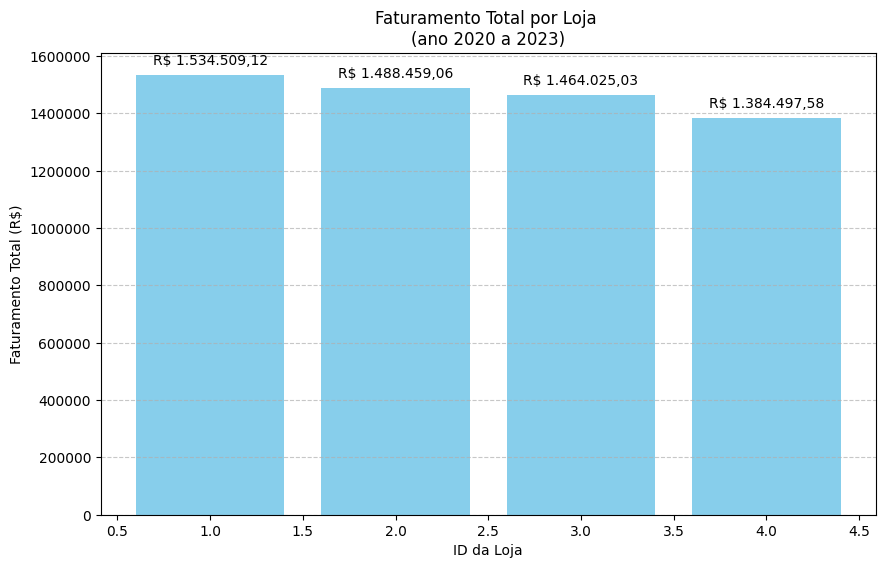

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Usando o faturamento que já calculamos
faturamento_por_loja = df_lojas_unificadas.groupby('ID Loja')['Preço'].sum()

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Criando o gráfico de barras
bars = ax.bar(faturamento_por_loja.index, faturamento_por_loja.values, color='skyblue')

# Formatando os valores como strings com R$, ponto e vírgula
# Criando uma lista com os rótulos formatados
labels_formatados = [f'R$ {valor:_.2f}'.replace('.', ',').replace('_', '.') for valor in faturamento_por_loja.values]

# Adicionando os rótulos formatados em cima de cada barra
ax.bar_label(bars, labels=labels_formatados, padding=5)

ax.set_title('Faturamento Total por Loja \n(ano 2020 a 2023)')
ax.set_xlabel('ID da Loja')
ax.set_ylabel('Faturamento Total (R$)')
ax.tick_params(axis='x', rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Para evitar que os números do eixo Y fiquem em notação científica (1e6)
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

#7. Popularidade das categorias

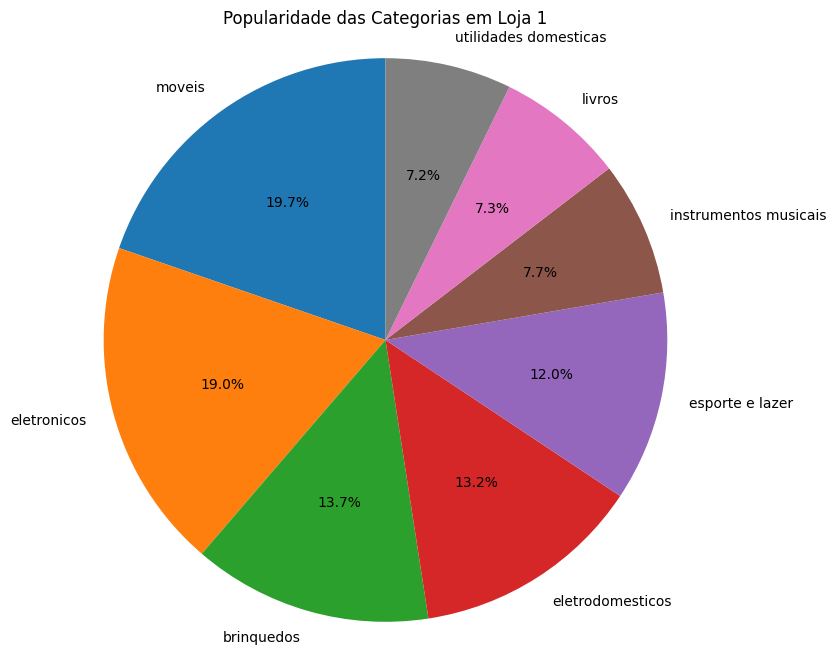

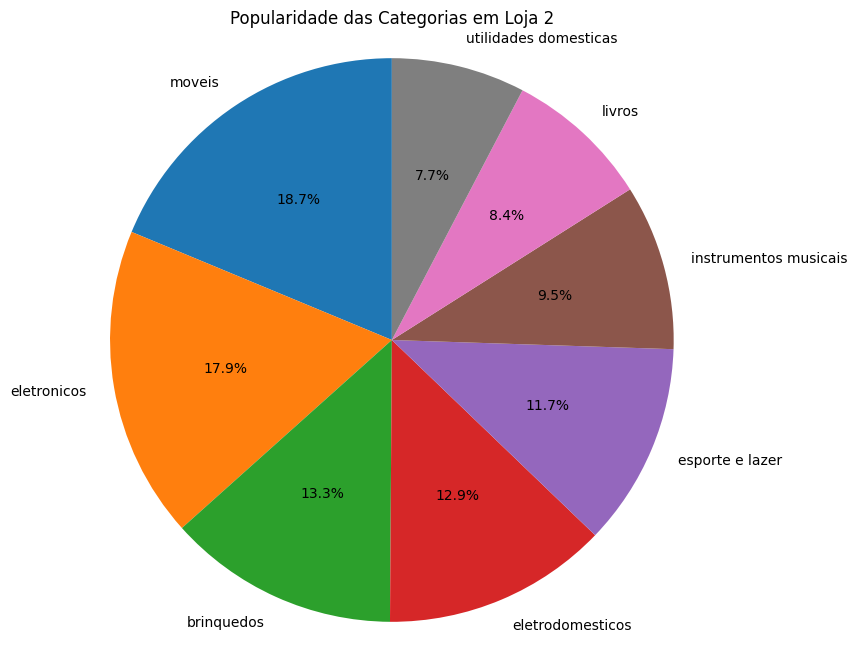

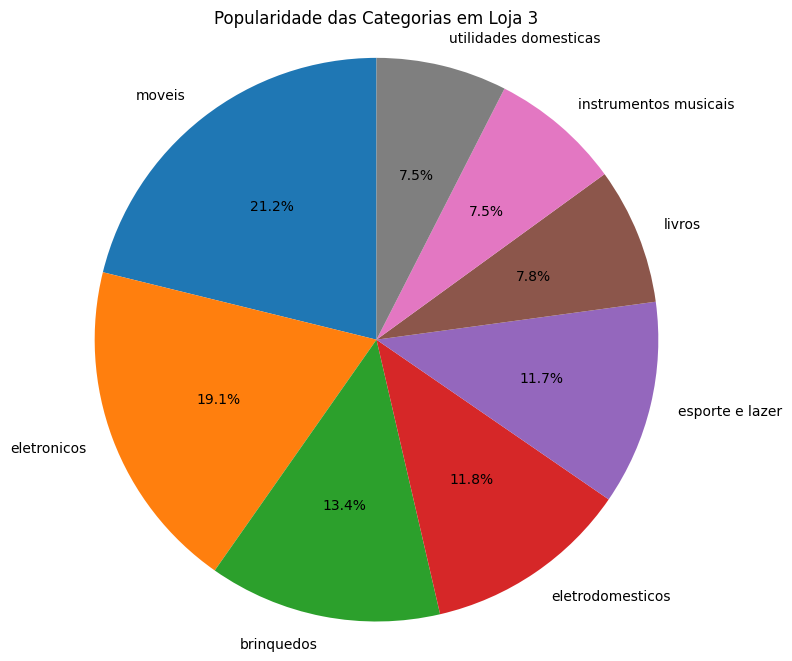

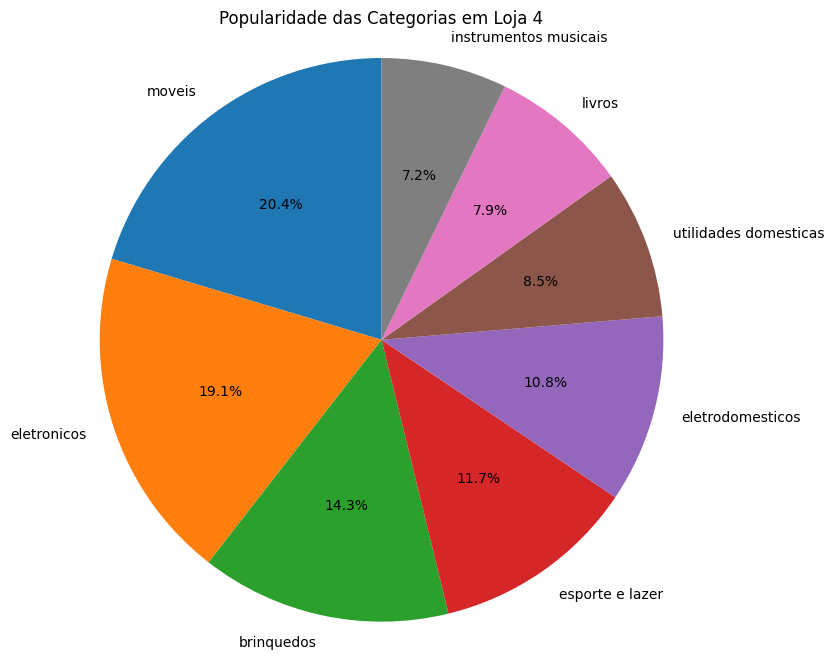

In [10]:
# Importando a biblioteca de visualização
import matplotlib.pyplot as plt
import pandas as pd

# Lista de DataFrames e nomes de lojas
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criando um gráfico de pizza para cada loja
for i, loja_df in enumerate(lojas):
    # Contando a popularidade de cada categoria do produto
    contagem_categorias = loja_df['Categoria do Produto'].value_counts()

    # Criando o gráfico de pizza
    plt.figure(figsize=(8, 8)) # Define o tamanho do gráfico para melhor visualização
    plt.pie(
        contagem_categorias,
        labels=contagem_categorias.index, # Usa o nome das categorias como rótulo
        autopct='%1.1f%%', # Mostra a porcentagem com uma casa decimal
        startangle=90
    )

    # Adicionando um título para o gráfico
    plt.title(f"Popularidade das Categorias em {nomes_lojas[i]}")

    # Garantindo que o gráfico seja circular
    plt.axis('equal')

    # Mostrando o gráfico
    plt.show()

#8. Avaliação média por loja

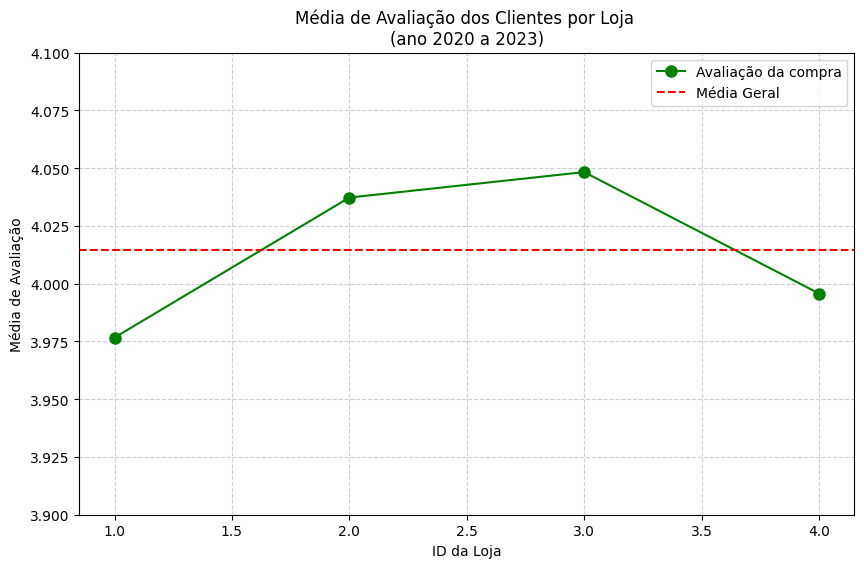

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Usando os dados de média de avaliação que já foi calculado
media_por_loja = df_lojas_unificadas.groupby('ID Loja')['Avaliação da compra'].mean()
media_geral = df_lojas_unificadas['Avaliação da compra'].mean()

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))
media_por_loja.plot(kind='line', marker='o', linestyle='-', color='green', markersize=8)

# Adicionando uma linha horizontal para a média geral, para comparação
plt.axhline(y=media_geral, color='r', linestyle='--', label='Média Geral')

# Adicionando rótulos, título e grade
plt.title('Média de Avaliação dos Clientes por Loja \n(ano 2020 a 2023)')
plt.xlabel('ID da Loja')
plt.ylabel('Média de Avaliação')
plt.ylim(3.9, 4.1) # Ajusta o limite do eixo Y para destacar as diferenças
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend() # Mostra a legenda da média geral
plt.show()